# House Prediction Case Study - Advanced Regression

**Problem Statement :**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know :

- Which variables are significant in predicting the price of a house?
- How well those variables describe the price of a house.

The company has collected a data set from the sale of houses in Australia. 

**Business Goal :**
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.

### Step 1: Reading and Understanding the Data

In [85]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [86]:
# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Importing dataset
housing_df = pd.read_csv('train.csv', encoding = 'latin')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Inspecting the Housing Data set**

In [88]:
housing_df.shape

(1460, 81)

The Dataset has 1460 rows and 81 columns.

In [89]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [90]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 2: Data Cleaning

In [91]:
# Checking for the top 20 coulumns with null values in the dataset
(round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [92]:
# Imputing NaN values based on data dictionary
# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing_df['PoolQC'] = housing_df['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing_df['MiscFeature'] = housing_df['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing_df['Alley'] = housing_df['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing_df['Fence'] = housing_df['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# So we impute it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing_df["LotFrontage"] = housing_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage,so we impute it with 0
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.So we impute it with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing_df[col] = housing_df[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing_df[col] = housing_df[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), we impute with the mode "None"
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), we impute with the mode "None"
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), we impute with "None"
housing_df['Electrical'] = housing_df['Electrical'].fillna("Other")

In [93]:
# Checking for the top 20 coulumns with null values in the dataset
(round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)).sort_values(ascending=False).head(20)

SalePrice       0.0
Heating         0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
YearRemodAdd    0.0
dtype: float64

**The NULL values have been handled**

### Step 3: Exploratory Data Analysis

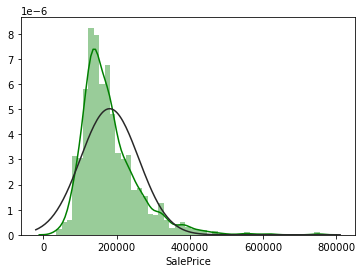

In [94]:
# Visualizing the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing_df['SalePrice'], fit=norm, color = "green")
plt.show()

The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

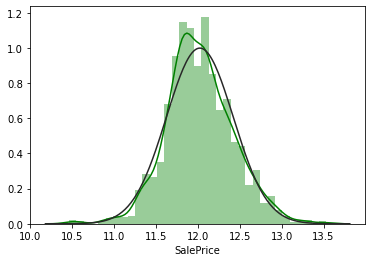

In [95]:
sns.distplot(np.log(housing_df['SalePrice']), fit=norm, color = "green")
plt.show()

**Taking the log of sale price transforms the distribution to approximately normal.This transformation increased the strength of linearity amongst most of our variables against sale price, validating the assumption of linearity in regression.**

**So while creating the model, we will use this Data Transformation for the target variable.**

**Correlation Matrix**

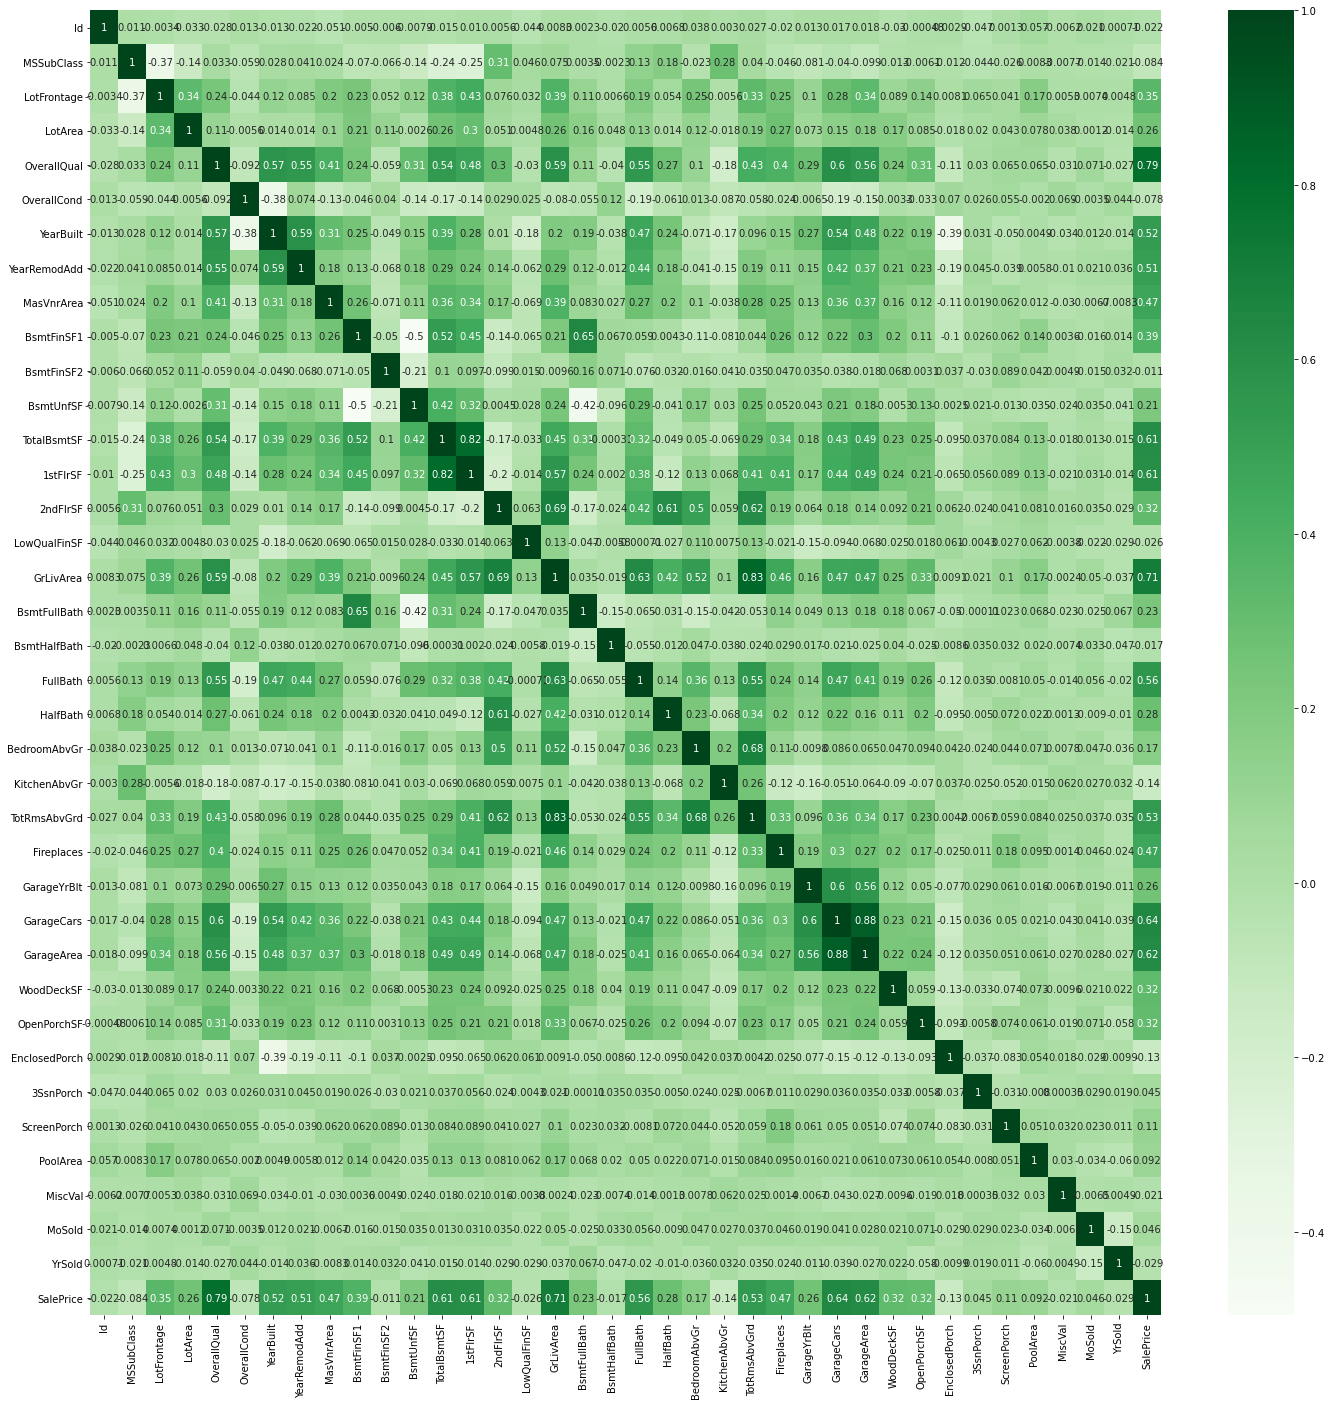

In [96]:
plt.figure(figsize=(24, 24))
sns.heatmap(housing_df.corr(), annot = True,cmap="Greens")
plt.show()

**Correlation Matrix of the top 10 correlations**

In [97]:
au_corr = housing_df.corr().abs().unstack().sort_values(ascending=False)
au_corr[au_corr<1][:20:2]

GarageCars    GarageArea      0.882475
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
SalePrice     GarageCars      0.640409
FullBath      GrLivArea       0.630012
dtype: float64

In [98]:
strong_corr = housing_df[["GarageCars","GarageArea","TotRmsAbvGrd","GrLivArea","1stFlrSF","TotalBsmtSF","OverallQual","SalePrice","2ndFlrSF","BedroomAbvGr"
                          ,"BsmtFinSF1","BsmtFullBath","FullBath"]]

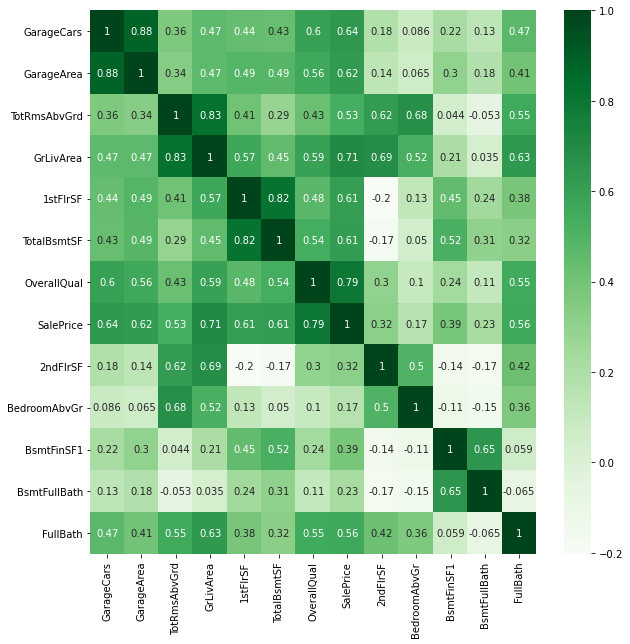

In [99]:
plt.figure(figsize=(10, 10))
sns.heatmap(strong_corr.corr(), annot = True,cmap="Greens")
plt.show()

<Figure size 720x360 with 0 Axes>

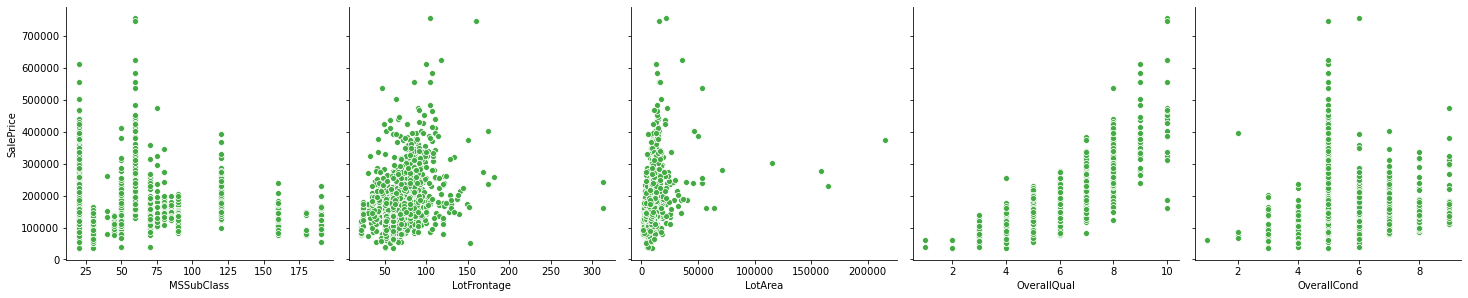

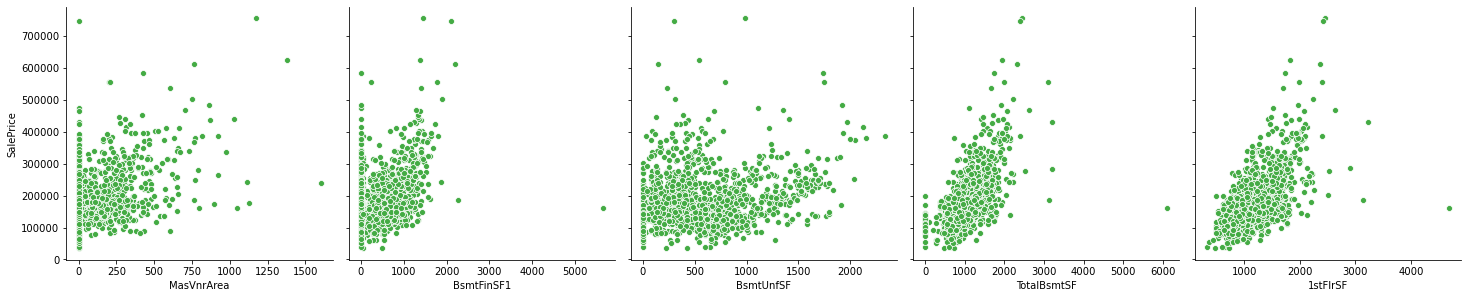

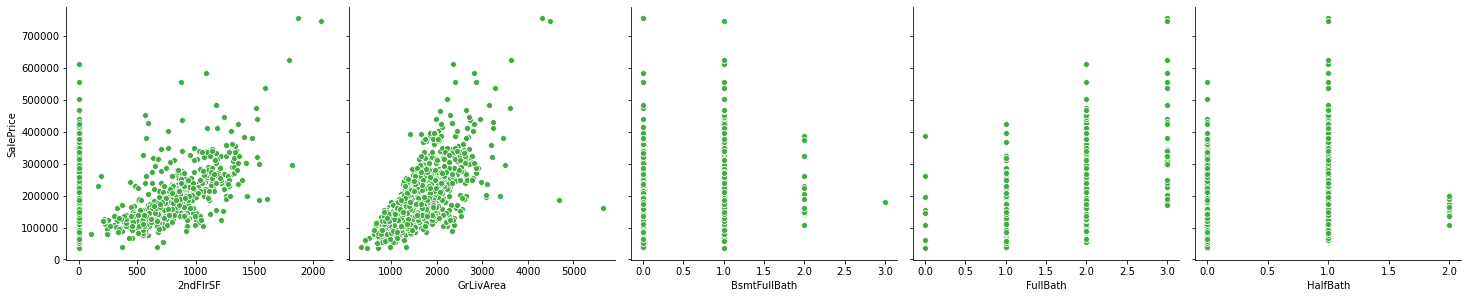

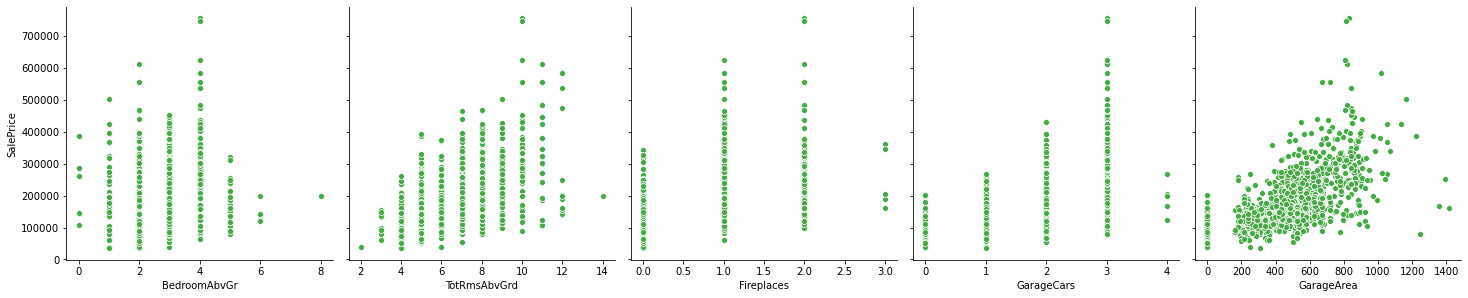

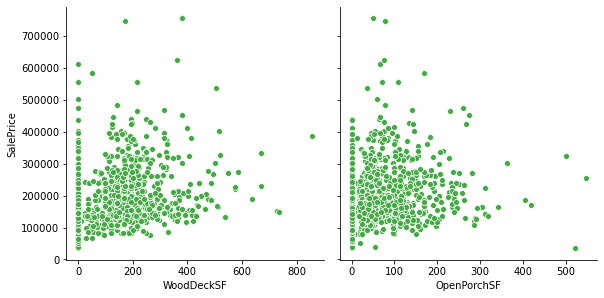

In [100]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_df, x_vars=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',plot_kws={'color': '#44ab44'})
sns.pairplot(housing_df, x_vars=['MasVnrArea','BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',plot_kws={'color': '#44ab44'})
sns.pairplot(housing_df, x_vars=['2ndFlrSF', 'GrLivArea','BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',plot_kws={'color': '#44ab44'})
sns.pairplot(housing_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',plot_kws={'color': '#44ab44'})
sns.pairplot(housing_df, x_vars=['WoodDeckSF','OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter',plot_kws={'color': '#44ab44'})
plt.show()

**Inference**
- 1stFlrSF, GrLivArea seems to be showing correlation with SalePrice.

Rest of the variables are too scattered and hence can be understood during further analysis.

#### Analyzing some of the highly correlated variables with the target varibale Sale price using charts

**Overall Quality Vs Sale Price**

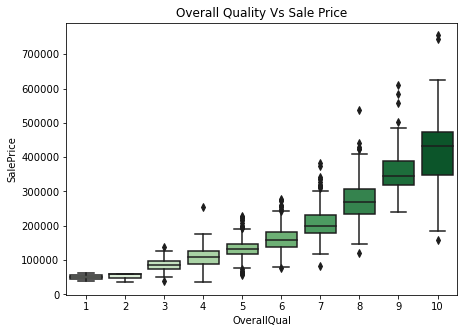

In [101]:
plt.figure(figsize=(7,5))
plt.title('Overall Quality Vs Sale Price')
sns.boxplot(x=housing_df['OverallQual'], y=housing_df.SalePrice, palette=("Greens"))
plt.show()

**Inference**
- Its clear from the box plot thta as the Overall Quality of the house increases, the Sale Price also increases.

**GrLivArea Vs SalePrice:**

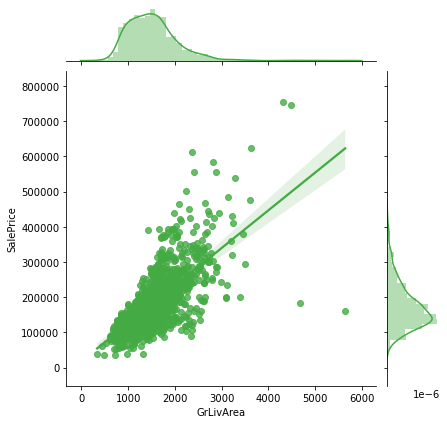

In [102]:
sns.jointplot(data=housing_df, x="GrLivArea", y="SalePrice",kind="reg", color = "#44ab44")
plt.show()

**Inference**
- People pay more for houses with larger living area.
- We see that there are some outliers in the data. The data points between area 4000-6000 which have low Sale Price.

**GarageCars Vs SalePrice**

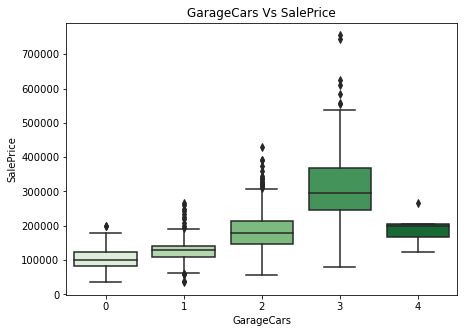

In [103]:
plt.figure(figsize=(7,5))
plt.title('GarageCars Vs SalePrice')
sns.boxplot(x=housing_df['GarageCars'], y=housing_df.SalePrice, palette=("Greens"))
plt.show()

**Inference**
- Houses with Garage Cars as 3 have higher sale price. But as the number increases the price decreases.

**GarageArea Vs SalePrice**

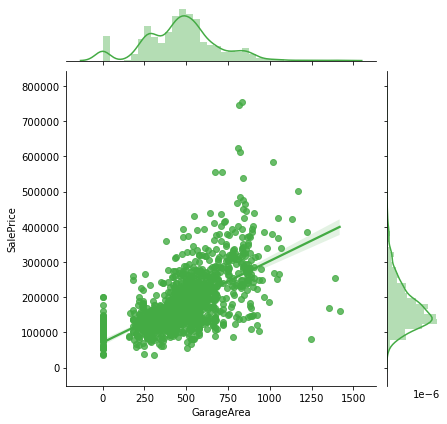

In [104]:
sns.jointplot(data=housing_df, x="GarageArea", y="SalePrice",kind="reg", color = "#44ab44")
plt.show()

**Inference**
- From the above plot, we can say that for GarageArea of 200–1000 has most of the SalePrice.

**1stFlrSF Vs SalePrice**

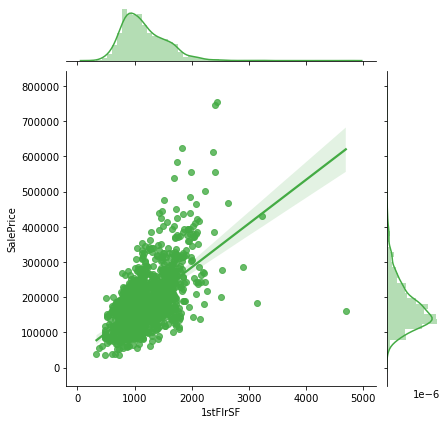

In [105]:
sns.jointplot(data=housing_df, x="1stFlrSF", y="SalePrice",kind="reg", color = "#44ab44")
plt.show()

**Inference**
- From the above plot, for 1stFirSF of 500–2000 has most of the SalePrice.
- As the 1st square feet increases, the sale price also increases.

**TotRmsAbvGrd Vs SalePrice**

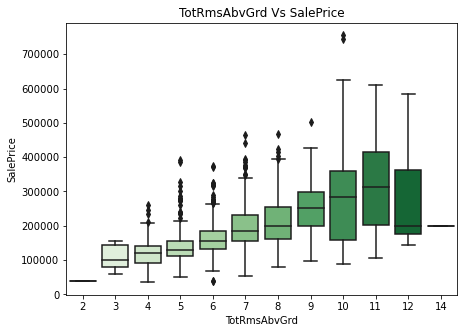

In [106]:
plt.figure(figsize=(7,5))
plt.title('TotRmsAbvGrd Vs SalePrice')
sns.boxplot(x=housing_df['TotRmsAbvGrd'], y=housing_df.SalePrice, palette=("Greens"))
plt.show()

**Inference**
- We see that as the total number of rooms increases above 11, the sale price drops.

In [107]:
# Removing the highly correlated variables

housing_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

### Step 4: Data Preparation

In [108]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

housing_Df = housing_df.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

**NUMERICAL FEATURES**

In [109]:
numeric_features = housing_Df.select_dtypes(include = ['float64','int64'])
numeric_features.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [110]:
# Changing the label for Ordinal features
# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housing_df = housing_df.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                                   "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,"Gd" : 4, "Ex" : 5},
                                   "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4},
                                   "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                   "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                                   "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3,"Gd" : 4, "Ex" : 5},
                                   "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                                   "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                   "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                                   "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, "GdPrv" : 4},
                                   "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,"Gd" : 4, "Ex" : 5},
                                   "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3,"Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7,"Typ" : 8},
                                   "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,"Gd" : 4, "Ex" : 5},
                                   "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,"Gd" : 4, "Ex" : 5},
                                   "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                                   "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,"Gd" : 4, "Ex" : 5},
                                   "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3,"Gd" : 4, "Ex" : 5},
                                   "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3,"Lvl" : 4},
                                   "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                                   "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3,"Reg" : 4},
                                   "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                                   "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3,"Ex" : 4},
                                   "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                                   "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3,"AllPub" : 4}}
                     )

housing_df.BsmtCond = housing_df.BsmtCond.astype(int)

**CATEGORICAL FEATURES**

In [111]:
categorical_features=housing_df.select_dtypes(include='object')
categorical_features.columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [112]:
#changing months to categorical
housing_df['MonthSold'] = housing_df['MoSold'].apply(lambda x: calendar.month_name[x])
housing_df=housing_df.drop(['MoSold'], axis=1)

In [113]:
#changing data type of Gararge yr built to int from float
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

In [114]:
# Derived variables which might make more sense than year
housing_df['Age'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['Remod_Age'] = housing_df['YrSold'] - housing_df['YearRemodAdd']
housing_df['Garage_Age'] = housing_df['YrSold'] - housing_df['GarageYrBlt']
housing_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

**OUTLIER TREATMENT**

In [115]:
def remove_outliers(data, num_list):
    for j in num_list:
        Q1 = data[j].quantile(0.05)
        Q3 = data[j].quantile(0.98)
        IQR = Q3 - Q1       
        data = data[(data[j] >= Q1-2.5*IQR) & (data[j] <= Q3+2.5*IQR)]
    return data

In [116]:
numeric_features = housing_df.select_dtypes(include = ['float64','int64'])
num_list=list(numeric_features.columns)

In [117]:
housing_df = remove_outliers(housing_df,num_list)

In [118]:
#converting binary variables to numeric by mapping to 0 and 1

housing_df['Street'] = housing_df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing_df['CentralAir'] = housing_df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
housing_df['PavedDrive'] = housing_df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [119]:
housing_final = housing_df.drop(['Id'],axis=1)
categorical_features = housing_final.select_dtypes(include=['object'])
categorical_features.head()

,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,February
1,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,May
2,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,September
3,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml,February
4,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,December


In [120]:
# convert into dummies
housing_df_dummies = pd.get_dummies(categorical_features, drop_first=True)
housing_df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Other,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [121]:
#dropping original categorical columns
housing_final = housing_final.drop(list(categorical_features.columns), axis=1)

In [122]:
#concatenating dummy columns to original dataframe
housing_final = pd.concat([housing_final,housing_df_dummies], axis=1)

In [123]:
housing_final.shape

(1305, 199)

### Step 5: Train & Test Split

In [124]:
# Train test split
housing_final_train,housing_final_test=train_test_split(housing_final,train_size=0.70, random_state=100)
housing_final_train.shape

(913, 199)

In [125]:
# Using log Data Transformation on the Target(dependent) variable and creating X, y train and test data

y_train = np.log(housing_final_train.SalePrice)
X_train = housing_final_train.drop("SalePrice",1)

y_test= np.log(housing_final_test.SalePrice)
X_test = housing_final_test.drop("SalePrice",1)

**Scaling the features**

In [126]:
# Scaling the numerical features of the dataset
num_features=X_train.select_dtypes(include=['int64','float64']).columns
num_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [127]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

### Step 6: Linear Regression Model

In [128]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**Recursive Feature Elimination**

In [129]:
rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

In [130]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_NridgHt', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Twnhs',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'Heating_GasA', 'Heating_GasW', 'Heating_Wall', 'Electrical_FuseP',
       'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

**Model 1**

In [131]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [132]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     242.2
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:03:28   Log-Likelihood:                 404.89
No. Observations:                 913   AIC:                            -769.8
Df Residuals:                     893   BIC:                            -673.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8245      0.125     86.447      0.000      10.579      11.070
OverallQual              0.1986      0.008     26.325      0.000       0.184       0.213
GrLivArea                0.1317      0.007     19.557      0.000       0.118       0.145
MSZoning_FV              0.6296      0.085      7.378      0.000       0.462       0.797
MSZoning_RH              0.5986      0.097      6.159      0.000       0.408       0.789
MSZoning_RL              0.6207      0.081      7.668      0.000       0.462       0.780
MSZoning_RM              0.4349      0.082      5.332      0.000       0.275       0.595
Neighborhood_NridgHt     0.1232      0.026      4.805      0.000       0.073       0.173
Condition2_Norm          0.1565      0.071      2.217      0.027       0.018       0.295
Condition2_PosN         -0.6174      0.134     -4.606      0.000      -0.880      -0.354
Condition2_RRNn          0.3641      0.172      2.111      0.035       0.026       0.703
BldgType_Twnhs          -0.0791      0.033     -2.367      0.018      -0.145      -0.014
Exterior1st_BrkComm     -0.4388      0.114     -3.841      0.000      -0.663      -0.215
Exterior1st_CBlock      -0.0778      0.079     -0.987      0.324      -0.232       0.077
Exterior2nd_CBlock      -0.0778      0.079     -0.987      0.324      -0.232       0.077
Heating_GasA             0.3591      0.065      5.558      0.000       0.232       0.486
Heating_GasW             0.3518      0.080      4.397      0.000       0.195       0.509
Heating_Wall             0.1627      0.111      1.460      0.145      -0.056       0.382
Electrical_FuseP        -0.2830      0.112     -2.534      0.011      -0.502      -0.064
SaleType_New             0.1710      0.027      6.235      0.000       0.117       0.225
SaleCondition_Normal     0.0909      0.018      5.014      0.000       0.055       0.126
==============================================================================
Omnibus:                       63.512   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.249
Skew:                          -0.389   Prob(JB):                     8.70e-34
Kurtosis:                       4.843   Cond. No.                     1.97e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Step 7: Ridge Regression Model

In [133]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 10.0}
-0.08180828418722189


In [135]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=100]
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018551,0.006167,0.007779,0.002631,0.0001,{'alpha': 0.0001},-0.089443,-0.093181,-0.083265,-0.087625,-0.084130,-0.087529,0.003616,26,-0.062397,-0.059702,-0.062093,-0.063022,-0.062387,-0.061920,0.001150
1,0.014958,0.001263,0.006386,0.000494,0.001,{'alpha': 0.001},-0.089425,-0.093135,-0.083205,-0.087612,-0.084089,-0.087493,0.003621,25,-0.062398,-0.059704,-0.062097,-0.063025,-0.062390,-0.061923,0.001150
2,0.013164,0.002034,0.004587,0.000798,0.01,{'alpha': 0.01},-0.089260,-0.092742,-0.082741,-0.087484,-0.083761,-0.087198,0.003654,24,-0.062426,-0.059724,-0.062171,-0.063063,-0.062423,-0.061962,0.001157
3,0.012168,0.000977,0.004189,0.000977,0.05,{'alpha': 0.05},-0.088673,-0.091538,-0.081632,-0.087020,-0.083277,-0.086428,0.003590,23,-0.062558,-0.059810,-0.062425,-0.063264,-0.062591,-0.062130,0.001196
4,0.013167,0.001164,0.004586,0.001020,0.1,{'alpha': 0.1},-0.088192,-0.090482,-0.080904,-0.086596,-0.083090,-0.085853,0.003452,22,-0.062718,-0.059925,-0.062728,-0.063488,-0.062821,-0.062336,0.001239
5,0.012368,0.001197,0.005384,0.000798,0.2,{'alpha': 0.2},-0.087387,-0.088998,-0.080281,-0.086039,-0.082872,-0.085115,0.003146,21,-0.063210,-0.060265,-0.063306,-0.063893,-0.063207,-0.062776,0.001281
6,0.012168,0.000747,0.005388,0.000800,0.3,{'alpha': 0.3},-0.086635,-0.087892,-0.079970,-0.085900,-0.082698,-0.084619,0.002888,20,-0.063736,-0.060592,-0.063750,-0.064314,-0.063486,-0.063176,0.001320
7,0.010991,0.006222,0.006248,0.007653,0.4,{'alpha': 0.4},-0.086172,-0.087013,-0.079851,-0.085975,-0.082665,-0.084335,0.002688,18,-0.064308,-0.060871,-0.064122,-0.064674,-0.063736,-0.063542,0.001369
8,0.015620,0.000004,0.000000,0.000000,0.5,{'alpha': 0.5},-0.085896,-0.086336,-0.079795,-0.086028,-0.082619,-0.084135,0.002556,17,-0.064824,-0.061109,-0.064449,-0.064968,-0.063968,-0.063864,0.001420
9,0.012497,0.006248,0.003125,0.006249,0.6,{'alpha': 0.6},-0.085700,-0.085812,-0.079744,-0.086103,-0.082597,-0.083991,0.002477,16,-0.065274,-0.061317,-0.064733,-0.065213,-0.064190,-0.064145,0.001467


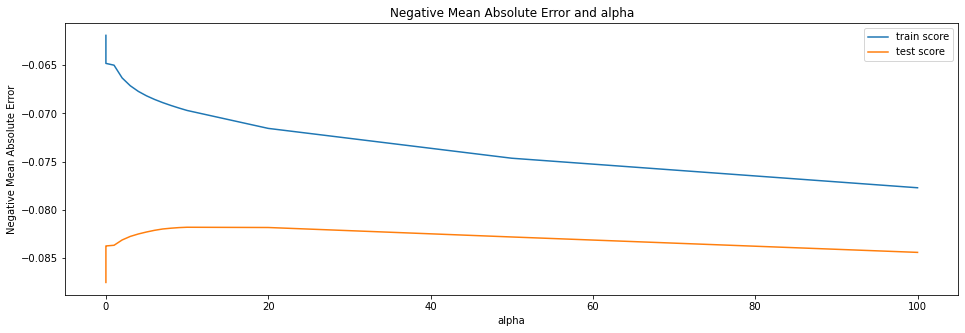

In [136]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**Final Ridge Model**

In [137]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=10.0)

In [138]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01915106,  0.00961972,  0.01333166,  0.        ,  0.00588975,
       -0.00049615, -0.00232959,  0.        ,  0.        ,  0.07603565,
        0.04928072, -0.00219975,  0.0076317 , -0.01128234,  0.00341581,
        0.01287634,  0.00904671,  0.0064435 ,  0.02087261, -0.00499437,
        0.00709613, -0.00271589,  0.02200092,  0.0154643 ,  0.        ,
        0.04378025,  0.0347614 ,  0.        ,  0.06310195,  0.02620079,
        0.00540454,  0.01732007,  0.0114901 ,  0.00903328, -0.0001862 ,
        0.01142624,  0.01342584,  0.01258903,  0.00681086,  0.004001  ,
        0.03241654,  0.01879302,  0.0014258 ,  0.        ,  0.01510629,
       -0.00148861,  0.00810628,  0.        ,  0.0143966 ,  0.        ,
        0.        , -0.00327528, -0.00099007, -0.06293035, -0.0073    ,
        0.01608319,  0.03506766,  0.06028559,  0.0436938 ,  0.00846487,
        0.03365728, -0.0194142 , -0.0167265 , -0.00294462, -0.00431307,
        0.00512743,  0.03904624,  0.00096799, -0.02070546,  0.07

In [139]:
#The R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9231129725616328


In [140]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9169204595404372


In [141]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

RMSE is:  0.01318258748128886


In [142]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0192
1,LotFrontage,0.0096
2,LotArea,0.0133
3,Street,0.0000
4,Alley,0.0059
5,LotShape,-0.0005
6,LandContour,-0.0023
7,Utilities,0.0000
8,LandSlope,0.0000
9,OverallQual,0.0760


In [143]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

**RFE**

In [144]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [145]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

top10_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
top10_df = top10_df.loc[top10_df['rfe_support'] == True]
top10_df.reset_index(drop=True, inplace=True)

top10_df['Coefficient'] = top10_df['Features'].apply(find)
top10_df = top10_df.sort_values(by=['Coefficient'], ascending=False)
top10_df = top10_df.head(10)
top10_df

,Features,rfe_support,rfe_ranking,Coefficient
5,Neighborhood_NridgHt,True,1,0.0762
0,OverallQual,True,1,0.0760
6,Condition2_Norm,True,1,0.0749
2,MSZoning_RH,True,1,0.0603
3,MSZoning_RL,True,1,0.0437
1,MSZoning_FV,True,1,0.0351
12,Heating_GasW,True,1,0.0272
11,Heating_GasA,True,1,0.0234
8,Condition2_RRNn,True,1,0.0149
4,MSZoning_RM,True,1,0.0085


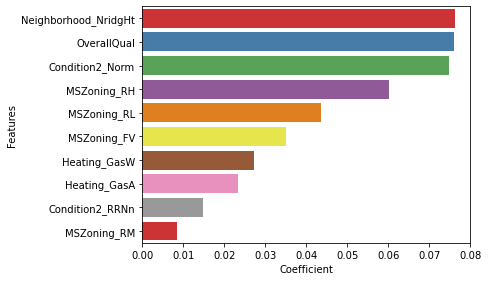

In [146]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = top10_df)
plt.show()

### Step 8: Lasso Regression Model

In [147]:
lasso = Lasso()
# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.069034,-0.080475,1
3,0.0004,-0.068167,-0.080634,2
5,0.001,-0.071921,-0.080772,3
2,0.0003,-0.066975,-0.080947,4
1,0.0002,-0.065599,-0.081298,5
0,0.0001,-0.063736,-0.082069,6
6,0.002,-0.076970,-0.084080,7
7,0.003,-0.079931,-0.085877,8
8,0.004,-0.081574,-0.086804,9
9,0.005,-0.082626,-0.087423,10


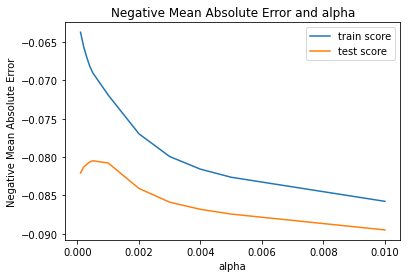

In [149]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [150]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [151]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.69878775e-02,  1.06875610e-02,  1.66346640e-02,  0.00000000e+00,
        7.39180489e-03,  3.28343813e-04, -1.37808957e-03,  0.00000000e+00,
        0.00000000e+00,  8.00499587e-02,  5.03959876e-02,  4.44938141e-04,
        7.66257233e-03, -1.09266053e-02,  0.00000000e+00,  7.78638222e-03,
        1.06256913e-02,  5.82037719e-03,  2.67632273e-02, -2.90512634e-03,
        6.34317286e-03, -0.00000000e+00,  2.22800180e-02,  1.48714765e-02,
        0.00000000e+00,  9.60839878e-03,  0.00000000e+00,  0.00000000e+00,
        1.12911382e-01,  2.43588799e-02,  5.23983946e-03,  1.43654308e-02,
        9.83241674e-03,  4.48987623e-03, -6.00328814e-04,  9.66610588e-03,
        1.36051150e-02,  1.01519634e-02,  6.92899787e-03,  2.80536871e-03,
        2.90825279e-02,  1.18442918e-02,  0.00000000e+00,  0.00000000e+00,
        1.31220768e-02, -7.69278565e-04,  6.69182415e-03,  0.00000000e+00,
        1.44561902e-02,  0.00000000e+00,  0.00000000e+00, -2.26319508e-03,
        0.00000000e+00, -

In [152]:
#The R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.924899371227304


In [153]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9206814282700926


In [154]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.012585818420954393

In [155]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0170
1,LotFrontage,0.0107
2,LotArea,0.0166
3,Alley,0.0074
4,LotShape,0.0003
5,LandContour,-0.0014
6,OverallQual,0.0800
7,OverallCond,0.0504
8,MasVnrArea,0.0004
9,ExterQual,0.0077


In [156]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

**RFE**

In [157]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [158]:

# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a dataframe for further display in the bar plot

top10_lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
top10_lasso_df = top10_lasso_df.loc[top10_lasso_df['rfe_support'] == True]
top10_lasso_df.reset_index(drop=True, inplace=True)

top10_lasso_df['Coefficient'] = top10_lasso_df['Features'].apply(find)
top10_lasso_df = top10_lasso_df.sort_values(by=['Coefficient'], ascending=False)
top10_lasso_df = top10_lasso_df.head(10)
top10_lasso_df

,Features,rfe_support,rfe_ranking,Coefficient
1,GrLivArea,True,1,0.112911
5,Neighborhood_Crawfor,True,1,0.098857
7,Neighborhood_NridgHt,True,1,0.093159
14,SaleCondition_Partial,True,1,0.089870
0,OverallQual,True,1,0.080050
13,SaleCondition_Normal,True,1,0.074469
8,Neighborhood_Somerst,True,1,0.069393
3,MSZoning_RH,True,1,0.067597
11,Exterior1st_BrkFace,True,1,0.061808
4,MSZoning_RL,True,1,0.028896


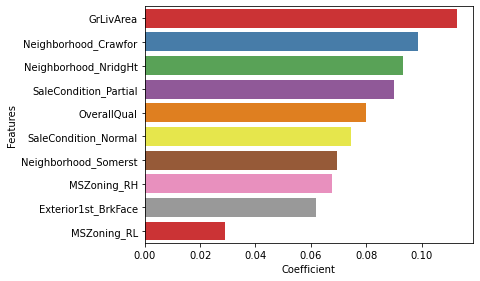

In [159]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = top10_lasso_df)
plt.show()

**Removing the first five important features from the data (As per the subjective question)**

In [160]:
# Dropping top five important features
var_missing  = ["GrLivArea","OverallQual","SaleCondition_Partial","Neighborhood_Crawfor","Neighborhood_NridgHt"]
X_train_new = X_train.drop(var_missing, axis = 1)
X_train_new.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallCond',
       ...
       'MonthSold_December', 'MonthSold_February', 'MonthSold_January',
       'MonthSold_July', 'MonthSold_June', 'MonthSold_March', 'MonthSold_May',
       'MonthSold_November', 'MonthSold_October', 'MonthSold_September'],
      dtype='object', length=193)

In [161]:
# Creating another lasso regression model
lasso = Lasso()
# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
# cross validation
folds = 5
lasso_model_cv1 = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv1.fit(X_train_new, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [162]:
lasso_model_cv1.best_estimator_

Lasso(alpha=0.0002)

In [163]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0002)

In [164]:
# Creating a dataframe of the features and their coefficients
lasso_df1 = pd.DataFrame({'Features':X_train_new .columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df1 = lasso_df1[lasso_df1['Coefficient'] != 0.00]
lasso_df1.reset_index(drop=True, inplace=True)
lasso_df1

,Features,Coefficient
0,MSSubClass,-0.0256
1,LotFrontage,0.0118
2,LotArea,0.0172
3,Alley,0.0055
4,LotShape,0.0054
5,LandContour,-0.0048
6,OverallCond,0.0508
7,MasVnrArea,0.0030
8,ExterQual,0.0227
9,ExterCond,-0.0101


In [165]:
# Put the Features and Coefficients in dictionary
lasso_coeff_dict1 = dict(pd.Series(lasso.coef_, index = X_train_new.columns))

In [166]:
# Do an RFE to minimise the features to 15

X_train_lasso1 = X_train_new[lasso_df1.Features]

lm = LinearRegression()
lm.fit(X_train_lasso1, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso1, y_train)

In [167]:
# Assign top 10 features to a dataframe for further display in the bar plot

top10_lasso_df1 = pd.DataFrame(list(zip( X_train_lasso1.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
top10_lasso_df1 = top10_lasso_df1.loc[top10_lasso_df1['rfe_support'] == True]
top10_lasso_df1.reset_index(drop=True, inplace=True)

top10_lasso_df1['Coefficient'] = top10_lasso_df1['Features'].apply(find)
top10_lasso_df1= top10_lasso_df1.sort_values(by=['Coefficient'], ascending=False)
top10_lasso_df1 = top10_lasso_df1.head(10)
top10_lasso_df1

,Features,rfe_support,rfe_ranking,Coefficient
4,MSZoning_RH,True,1,0.067597
5,MSZoning_RL,True,1,0.028896
0,1stFlrSF,True,1,0.009608
3,MSZoning_FV,True,1,0.003657
1,2ndFlrSF,True,1,0.000000
6,MSZoning_RM,True,1,0.000000
10,HouseStyle_2.5Unf,True,1,0.000000
11,RoofStyle_Gambrel,True,1,0.000000
12,Exterior1st_BrkComm,True,1,-0.000000
13,Heating_GasA,True,1,0.000000


### Conclusion :
The **optimal lambda** value in case of Ridge and Lasso is as below:

- Ridge - 10
- Lasso - 0.0005

The **Mean Squared error** in case of Ridge and Lasso are:

- Ridge - 0.013182
- Lasso - 0.012585

The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

**Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.**